In [2]:
import json
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("dataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


<Axes: xlabel='track_genre'>

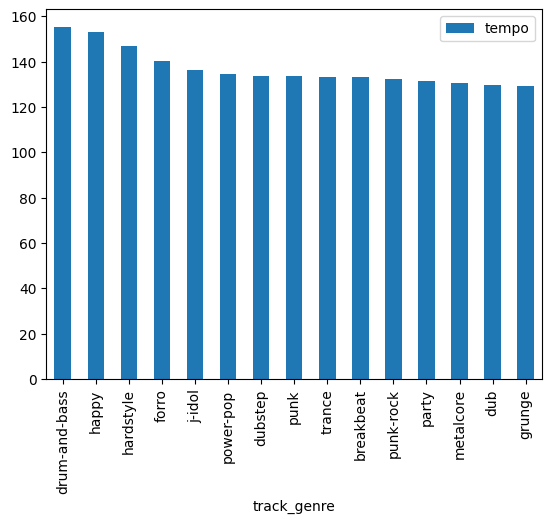

In [5]:
#first 15 by tempo

df.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)[:15].plot.bar(legend=True)

<Axes: xlabel='track_genre'>

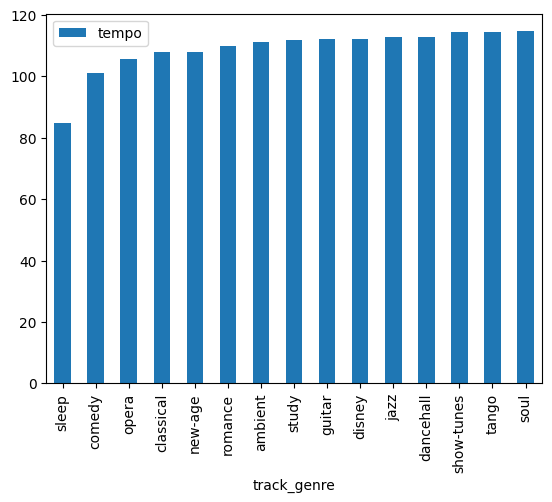

In [6]:
#last 15 by tempo
df.groupby('track_genre')['tempo'].mean().sort_values(ascending=True)[:15].plot.bar(legend=True)

<Axes: xlabel='track_genre'>

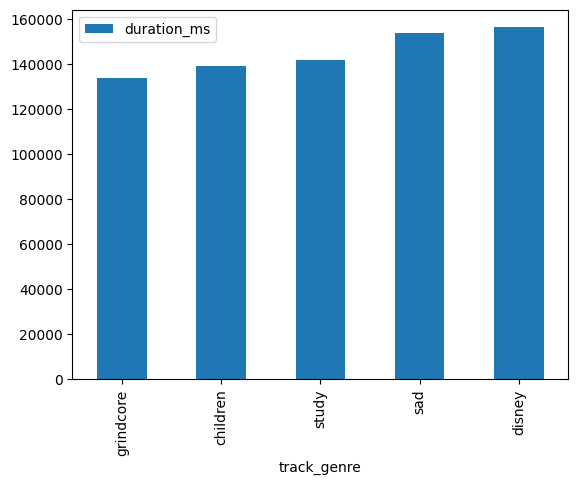

In [7]:
#last 5 by duration
df.groupby('track_genre')['duration_ms'].mean().sort_values(ascending=True)[:5].plot.bar(legend=True)

<Axes: xlabel='track_genre'>

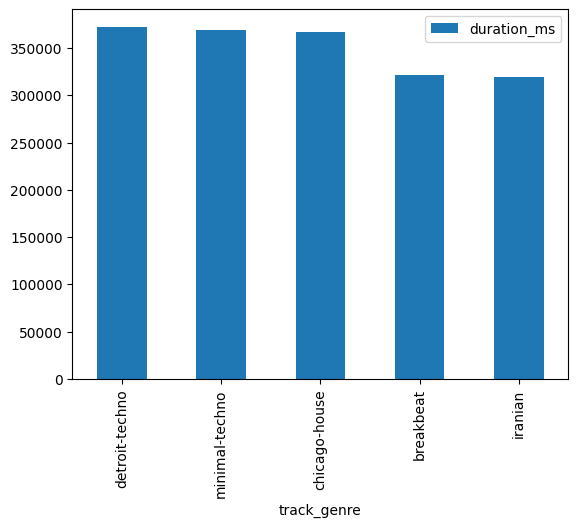

In [8]:
#first 5 by duration
df.groupby('track_genre')['duration_ms'].mean().sort_values(ascending=False)[:5].plot.bar(legend=True)

<Axes: title={'center': 'Spotify Dataset'}, xlabel='popularity', ylabel='duration_ms'>

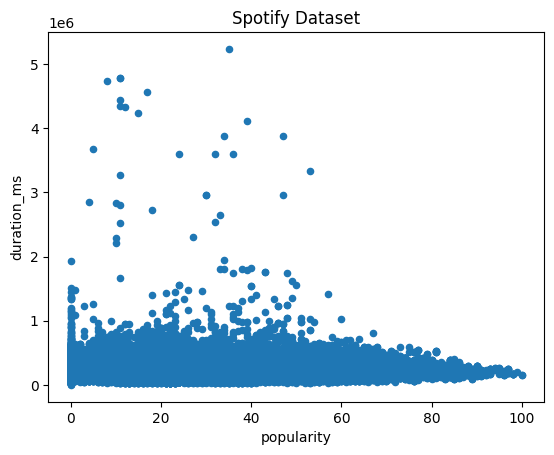

In [9]:
df.plot.scatter(x = 'popularity', y = 'duration_ms', title='Spotify Dataset')

<Axes: xlabel='duration_ms'>

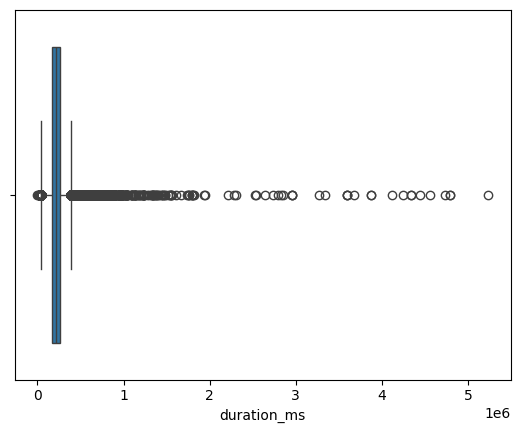

In [10]:
sns.boxplot(x = 'duration_ms', data=df)

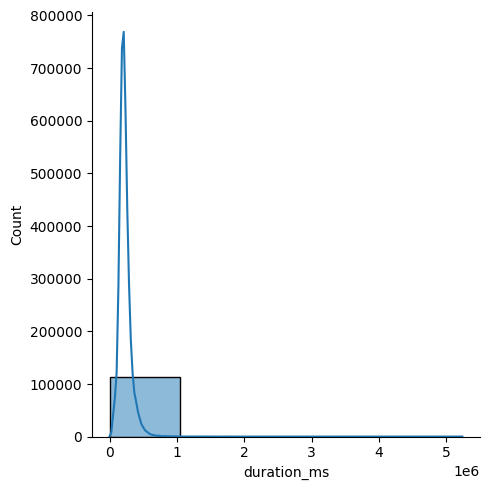

In [11]:
sns.displot(df['duration_ms'], bins=5, kde=True)

<Axes: xlabel='duration_ms'>

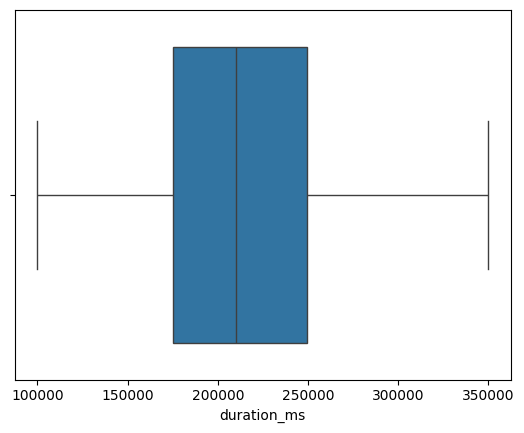

In [12]:
sns.boxplot(x = 'duration_ms', data=df[(df['duration_ms'] < 350000) & (df['duration_ms'] > 100000) ])

In [8]:
df_new = df[(df['duration_ms'] < 350000) & (df['duration_ms'] > 100000) ]

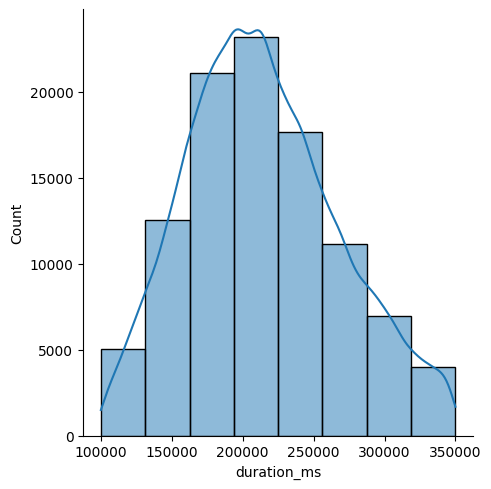

In [14]:
sns.displot(df_new['duration_ms'], bins=8, kde=True)

In [15]:
df_new.groupby('track_genre')['popularity'].mean().sort_values()

track_genre
iranian            1.720812
romance            3.136606
latin              8.337688
detroit-techno    11.417778
chicago-house     12.705305
                    ...    
grunge            49.652577
sad               52.104978
chill             53.437634
k-pop             57.531012
pop-film          59.622685
Name: popularity, Length: 114, dtype: float64

In [10]:
df_sub = pd.DataFrame(df_new, columns=["track_genre", "track_id", "artists","duration_ms", "popularity","danceability", "energy", "speechiness","acousticness","valence","tempo"]).sort_values(by=["track_genre","popularity"])
df_sub = df_sub.rename(columns={"track_id": "_id"})
df_sub

,track_genre,_id,artists,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo
23,acoustic,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,216386,0,0.572,0.454,0.0258,0.4770,0.515,140.182
24,acoustic,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,231266,0,0.796,0.667,0.0392,0.3810,0.754,97.988
26,acoustic,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,131760,0,0.620,0.309,0.0495,0.7880,0.664,145.363
27,acoustic,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,273653,0,0.633,0.429,0.0381,0.0444,0.520,143.793
28,acoustic,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,131760,0,0.620,0.309,0.0495,0.7880,0.664,145.363
...,...,...,...,...,...,...,...,...,...,...,...
113000,world-music,5XCtjnFMKtCT7ycDwV3Kdh,Hillsong Worship;Brooke Ligertwood,240200,66,0.417,0.499,0.0296,0.2120,0.144,135.923
113001,world-music,0fxpHpK3aw2nFWII6yveDD,Matt Redman,342493,66,0.431,0.485,0.0274,0.4520,0.367,145.220
113013,world-music,1gj9poFl2mLKkguqWo5Y1i,Bethel Music;Jenn Johnson,296400,66,0.466,0.670,0.0297,0.1550,0.395,126.142
113024,world-music,1mWdyqs6Zvg8b1lKjDc8yB,Chris Tomlin,293398,66,0.429,0.587,0.0275,0.3150,0.164,145.003


In [11]:
encoder = LabelEncoder()
df_sub["artists_id"] = encoder.fit_transform(df_sub["artists"])
df_sub
df_sub.to_json('track_analysis.json', orient='records')

In [45]:
df_sub["artists"].value_counts(),df_sub["artists_id"].value_counts()

(artists
 George Jones                              271
 The Beatles                               261
 Stevie Wonder                             236
 Linkin Park                               221
 Ella Fitzgerald                           216
                                          ... 
 Phil Wickham;Lecrae                         1
 for KING & COUNTRY;Hillary Scott            1
 Bethel Music;Zach Vestnys;Abby Vestnys      1
 Rend Collective;Hillsong Young & Free       1
 for KING & COUNTRY;Andy Mineo               1
 Name: count, Length: 28651, dtype: int64,
 artists_id
 9505     271
 24589    261
 23700    236
 14661    221
 7815     216
         ... 
 19581      1
 28041      1
 3112       1
 20899      1
 28036      1
 Name: count, Length: 28651, dtype: int64)

In [19]:
df_sub["track_genre"].value_counts()

track_genre
latin             995
electro           994
rock-n-roll       994
reggaeton         991
house             991
                 ... 
grindcore         529
chicago-house     509
classical         478
detroit-techno    450
minimal-techno    426
Name: count, Length: 114, dtype: int64

In [21]:
df_pop_genre_agg_median = df_sub[["track_genre","duration_ms", "popularity","danceability", "energy", "speechiness","acousticness","valence","tempo"]]
df_pop_genre_agg_median = df_pop_genre_agg_median.groupby('track_genre').agg("median")
df_pop_genre_agg_median

,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo
track_genre,,,,,,,,
acoustic,215213.0,47.0,0.5630,0.3910,0.03520,0.69400,0.3730,117.8400
afrobeat,223609.5,21.0,0.6925,0.7280,0.05525,0.17100,0.7270,116.0010
alt-rock,227399.0,45.0,0.5445,0.8000,0.04175,0.02645,0.5340,124.0420
alternative,215000.0,1.0,0.5630,0.7420,0.04840,0.03940,0.4840,121.1410
ambient,211800.0,50.0,0.3785,0.1715,0.03730,0.93300,0.1260,111.9045
...,...,...,...,...,...,...,...,...
techno,231493.0,43.0,0.6630,0.8260,0.04680,0.02070,0.3340,126.0410
trance,204796.5,44.0,0.5790,0.8800,0.05300,0.00794,0.2315,129.8925
trip-hop,243373.0,38.0,0.6440,0.6230,0.04430,0.13800,0.4880,112.0300


In [23]:
df_genre_agg_mean =df_sub[["track_genre","duration_ms", "popularity","danceability", "energy", "speechiness","acousticness","valence","tempo"]]
df_genre_agg_mean = df_genre_agg_mean.groupby('track_genre').agg("mean")
df_genre_agg_mean

,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo
track_genre,,,,,,,,
acoustic,214872.095337,42.614508,0.551395,0.434726,0.042921,0.568062,0.422727,119.003654
afrobeat,226389.179398,24.715278,0.672957,0.705258,0.087214,0.262171,0.699764,119.495424
alt-rock,229575.113779,34.269311,0.536887,0.754688,0.054964,0.122629,0.521551,124.320665
alternative,217905.089969,24.330920,0.562685,0.718072,0.070335,0.150545,0.496268,121.851349
ambient,216718.650498,44.621891,0.376636,0.226924,0.040345,0.798441,0.168765,111.308854
...,...,...,...,...,...,...,...,...
techno,240189.881384,39.466227,0.655486,0.776621,0.066326,0.105596,0.377237,129.734124
trance,213612.727794,39.107450,0.572414,0.848239,0.076076,0.040460,0.277377,131.435342
trip-hop,245989.619735,34.410349,0.635359,0.617913,0.077595,0.235581,0.489992,118.144181


<Axes: xlabel='track_genre'>

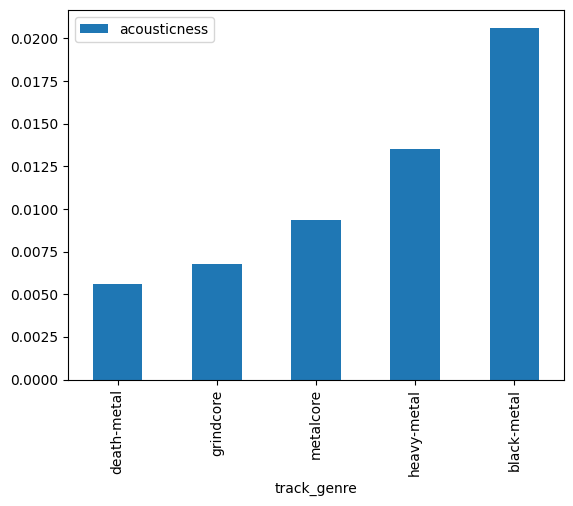

In [26]:
df_genre_agg_mean["acousticness"].sort_values(ascending=True)[:5].plot.bar(legend=True)

<Axes: xlabel='track_genre'>

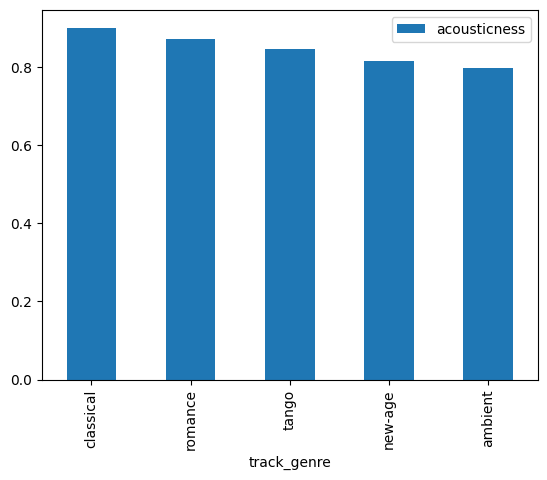

In [27]:
df_genre_agg_mean["acousticness"].sort_values(ascending=False)[:5].plot.bar(legend=True)

<Axes: xlabel='track_genre'>

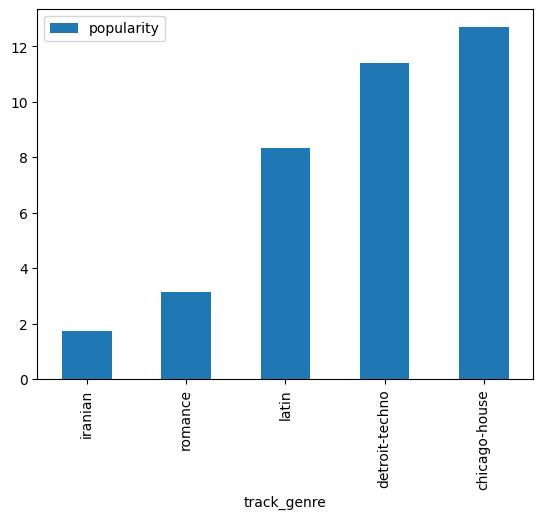

In [28]:
df_genre_agg_mean["popularity"].sort_values(ascending=True)[:5].plot.bar(legend=True)

In [62]:
df_sub[df_sub["danceability"] == 0]

,track_genre,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo,artists_id
4131,ambient,151506,64,0.0,0.036200,0.0,0.99400,0.0,0.0,16544
45670,guitar,148711,22,0.0,0.001080,0.0,0.95200,0.0,0.0,14738
45729,guitar,133624,22,0.0,0.004000,0.0,0.97000,0.0,0.0,14738
45720,guitar,102000,23,0.0,0.001290,0.0,0.96900,0.0,0.0,14738
64826,jazz,147000,62,0.0,0.405000,0.0,0.84200,0.0,0.0,15059
93111,romance,122206,26,0.0,0.122000,0.0,0.98700,0.0,0.0,16568
101867,sleep,300000,32,0.0,0.033300,0.0,0.98100,0.0,0.0,2562
101914,sleep,128916,32,0.0,0.055500,0.0,0.84400,0.0,0.0,25023
101919,sleep,300000,32,0.0,0.033300,0.0,0.98100,0.0,0.0,2562
101921,sleep,187106,32,0.0,0.000020,0.0,0.11200,0.0,0.0,385


<Axes: xlabel='popularity'>

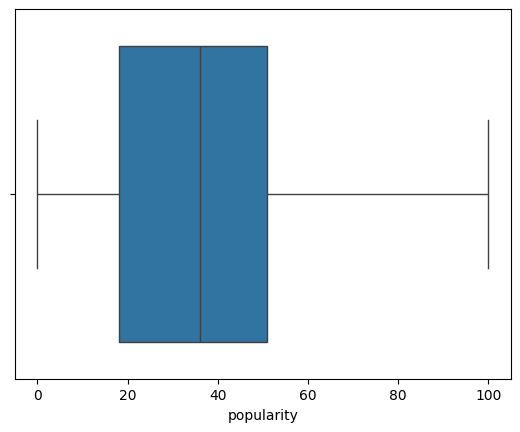

In [61]:
sns.boxplot(x = 'popularity', data=df_sub)

In [24]:
df_sub[df_sub["track_genre"] == "techno"]

,track_genre,artists,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo
109022,techno,Zedd;Kehlani,210901,0,0.693,0.565,0.0378,0.39600,0.588,185.916
109027,techno,Zedd;Liam Payne,204693,0,0.723,0.924,0.0516,0.03320,0.527,108.009
109030,techno,Zedd;Liam Payne,204693,0,0.723,0.924,0.0516,0.03320,0.527,108.009
109034,techno,Zedd;Maren Morris;Grey,184732,0,0.753,0.657,0.0450,0.17300,0.435,107.013
109035,techno,Duke Dumont,206320,0,0.670,0.776,0.0470,0.00388,0.624,115.034
...,...,...,...,...,...,...,...,...,...,...
109003,techno,Zedd;Alessia Cara,210090,76,0.690,0.622,0.0622,0.25300,0.544,102.040
109011,techno,ATB;Topic;A7S,150052,78,0.669,0.784,0.1120,0.19400,0.517,125.993
109021,techno,Matt Sassari,102860,79,0.874,0.869,0.0315,0.00116,0.726,126.027
109007,techno,Zedd;Maren Morris;Grey,184732,80,0.753,0.657,0.0449,0.17100,0.437,107.010


<Axes: xlabel='artists_id', ylabel='popularity'>

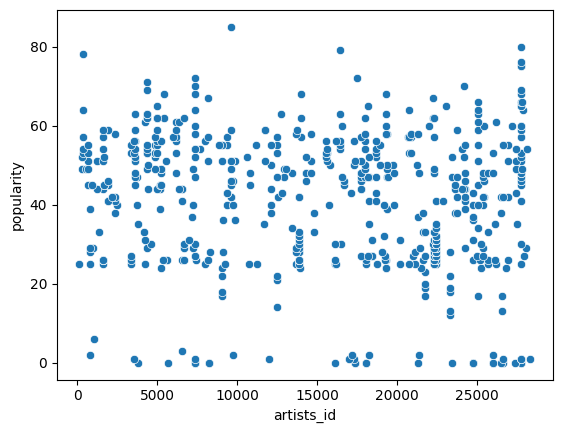

In [46]:
sns.scatterplot(y='popularity', x='artists_id', data=df_sub[df_sub["track_genre"] == "techno"])

<Axes: xlabel='popularity', ylabel='energy'>

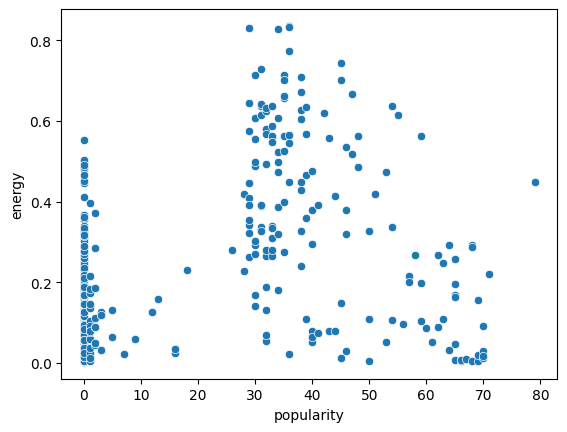

In [35]:
sns.scatterplot(x='popularity', y='energy', data=df_genre_prop[df_genre_prop["track_genre"] == "classical"])

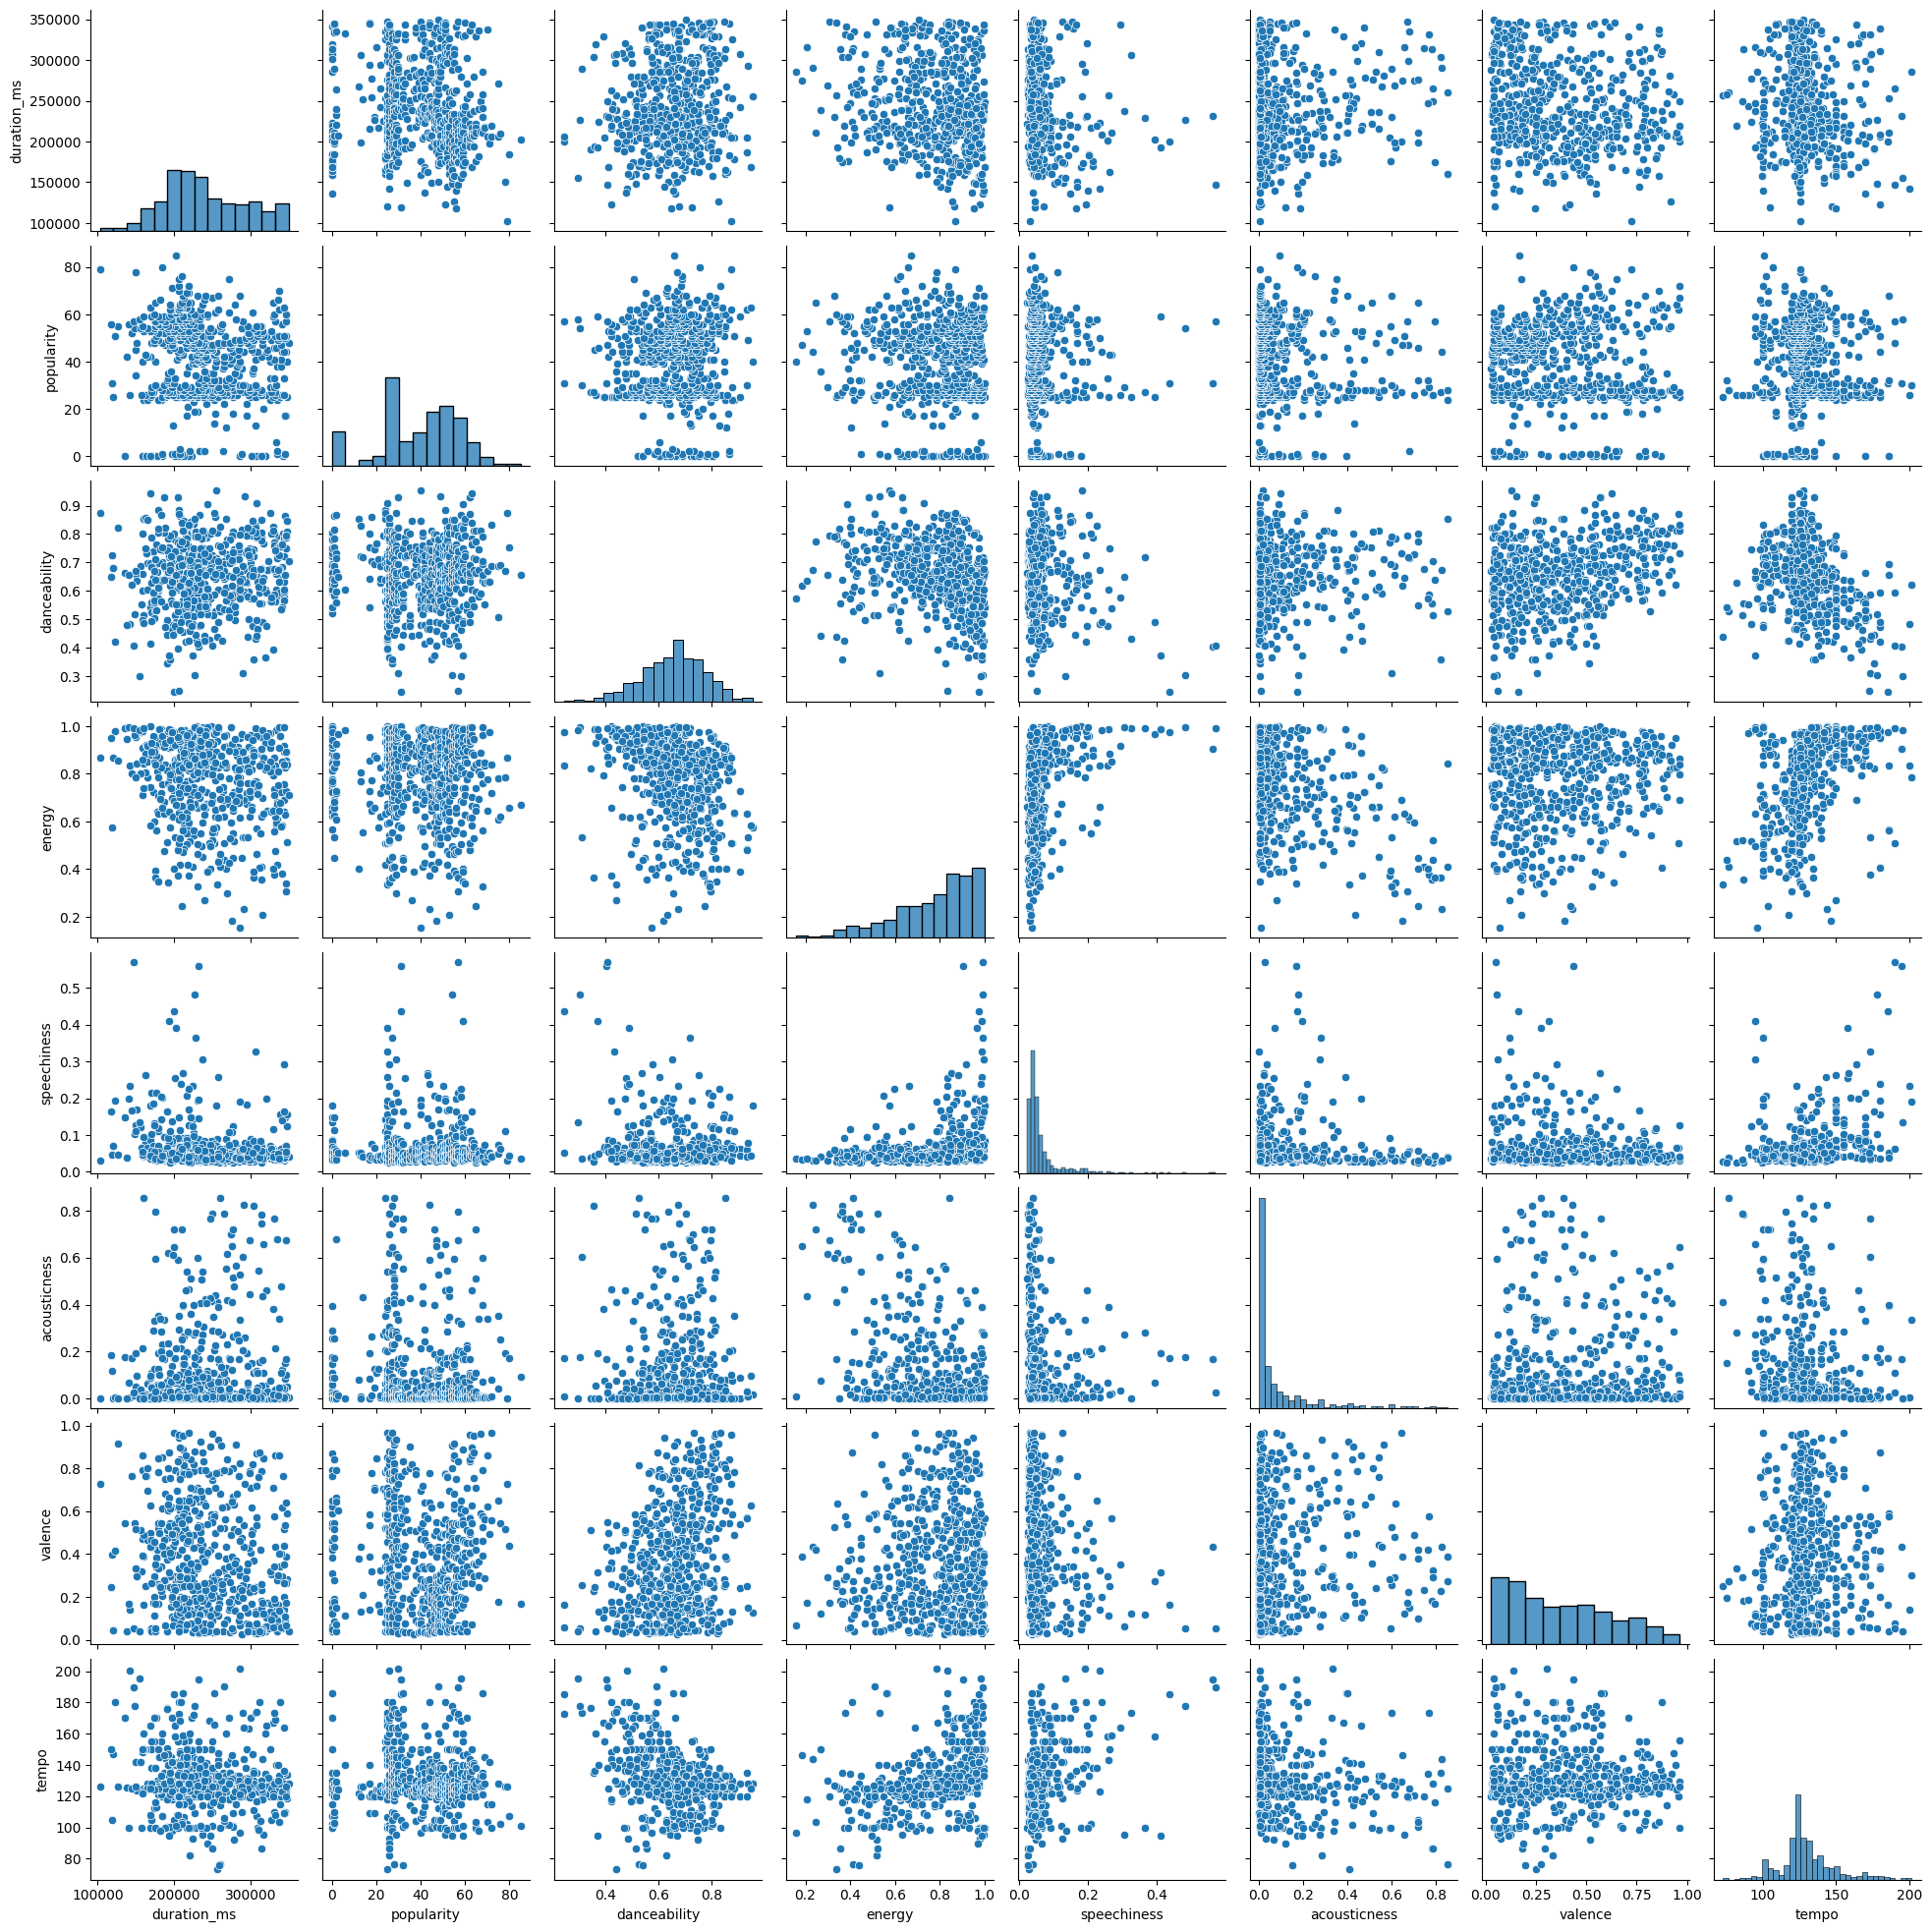

In [147]:
sns.pairplot(df_pop_genre[df_pop_genre["track_genre"] == "techno"])

In [65]:
df_sub.drop("artists", axis=1, inplace=True)
genres = df_sub["track_genre"].unique()

columns = df_sub.columns
genres, columns

(array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
        'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
        'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
        'chill', 'classical', 'club', 'comedy', 'country', 'dance',
        'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
        'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
        'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
        'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
        'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
        'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
        'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
        'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
        'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
        'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film

In [51]:
df_corr_popularity_per_genre = pd.DataFrame()
for idx, genre in enumerate(genres):
    (genre)
    df_corr_popularity_per_genre.at[idx,"genre"] = genre
    df_genre = df_sub[df_sub["track_genre"] == genre]
    for column in columns[1:]:
        column_name = "corr_popularity_" + column
        corr = df_genre[column].corr(df_genre["popularity"])
        df_corr_popularity_per_genre.at[idx, column_name] = corr

df_corr_popularity_per_genre

,genre,corr_popularity_duration_ms,corr_popularity_popularity,corr_popularity_danceability,corr_popularity_energy,corr_popularity_speechiness,corr_popularity_acousticness,corr_popularity_valence,corr_popularity_tempo,corr_popularity_artists_id
0,acoustic,0.020990,1.0,0.044846,-0.193434,-0.095608,0.132164,-0.192700,-0.003876,-0.004288
1,afrobeat,-0.086421,1.0,-0.015381,-0.042061,0.066988,0.057061,-0.082934,-0.005015,-0.193446
2,alt-rock,0.065214,1.0,0.023138,-0.063947,-0.031318,-0.027341,-0.079007,-0.039386,0.121179
3,alternative,0.063293,1.0,0.000746,0.034030,-0.110638,-0.092103,-0.104773,-0.020617,0.171301
4,ambient,0.028141,1.0,0.017828,0.042100,-0.040890,-0.014846,0.021728,0.007055,-0.107385
...,...,...,...,...,...,...,...,...,...,...
109,techno,-0.070648,1.0,0.005007,-0.067510,-0.017670,-0.060026,-0.091929,-0.008361,-0.171852
110,trance,-0.039275,1.0,-0.093101,0.013192,-0.109075,0.015302,-0.057218,-0.007621,-0.050694
111,trip-hop,0.029296,1.0,-0.016216,-0.084613,-0.141475,0.052246,-0.235031,0.008099,-0.024585
112,turkish,-0.081633,1.0,0.037194,0.015955,0.014712,-0.051526,-0.071786,-0.006866,-0.012817


In [52]:
df_corr_popularity_per_genre.to_json("corr_popularity_prop_per_genre.json")

In [53]:
df = pd.read_json("corr_popularity_prop_per_genre.json")
df

,genre,corr_popularity_duration_ms,corr_popularity_popularity,corr_popularity_danceability,corr_popularity_energy,corr_popularity_speechiness,corr_popularity_acousticness,corr_popularity_valence,corr_popularity_tempo,corr_popularity_artists_id
0,acoustic,0.020990,1,0.044846,-0.193434,-0.095608,0.132164,-0.192700,-0.003876,-0.004288
1,afrobeat,-0.086421,1,-0.015381,-0.042061,0.066988,0.057061,-0.082934,-0.005015,-0.193446
2,alt-rock,0.065214,1,0.023138,-0.063947,-0.031318,-0.027341,-0.079007,-0.039386,0.121179
3,alternative,0.063293,1,0.000746,0.034030,-0.110638,-0.092103,-0.104773,-0.020617,0.171301
4,ambient,0.028141,1,0.017828,0.042100,-0.040890,-0.014846,0.021728,0.007055,-0.107385
...,...,...,...,...,...,...,...,...,...,...
109,techno,-0.070648,1,0.005007,-0.067510,-0.017670,-0.060026,-0.091929,-0.008361,-0.171852
110,trance,-0.039275,1,-0.093101,0.013192,-0.109075,0.015302,-0.057218,-0.007621,-0.050694
111,trip-hop,0.029296,1,-0.016216,-0.084613,-0.141475,0.052246,-0.235031,0.008099,-0.024585
112,turkish,-0.081633,1,0.037194,0.015955,0.014712,-0.051526,-0.071786,-0.006866,-0.012817


In [57]:
df.sort_values(by="corr_popularity_artists_id", ascending=False)

,genre,corr_popularity_duration_ms,corr_popularity_popularity,corr_popularity_danceability,corr_popularity_energy,corr_popularity_speechiness,corr_popularity_acousticness,corr_popularity_valence,corr_popularity_tempo,corr_popularity_artists_id
77,pagode,0.165101,1,-0.262355,-0.017101,-0.073523,0.339155,0.116335,0.063789,0.229360
10,breakbeat,-0.006096,1,-0.267626,0.071344,-0.044471,-0.003722,-0.161876,0.030394,0.212879
75,new-age,-0.048433,1,0.086752,0.205559,-0.049929,-0.186988,0.031316,-0.011467,0.179986
3,alternative,0.063293,1,0.000746,0.034030,-0.110638,-0.092103,-0.104773,-0.020617,0.171301
8,blues,0.257987,1,-0.093667,0.133893,-0.054944,-0.376134,-0.253857,0.058297,0.150666
...,...,...,...,...,...,...,...,...,...,...
81,pop-film,0.082160,1,0.122907,0.027335,-0.047887,-0.081068,-0.003344,-0.007634,-0.210570
70,mandopop,0.170856,1,0.040142,0.035320,-0.019030,0.025307,-0.123313,0.128578,-0.217700
93,romance,0.059703,1,-0.003294,0.123137,-0.074406,-0.171532,0.048001,0.044655,-0.228421
101,sleep,-0.003452,1,-0.389470,-0.238363,-0.118051,0.109638,-0.276539,-0.148189,-0.332443


In [77]:
df[df["genre"] == "techno"]

,genre,corr_popularity_duration_ms,corr_popularity_popularity,corr_popularity_danceability,corr_popularity_energy,corr_popularity_speechiness,corr_popularity_acousticness,corr_popularity_valence,corr_popularity_tempo
109,techno,-0.070648,1,0.005007,-0.06751,-0.01767,-0.060026,-0.091929,-0.008361


In [56]:
#overall corr
df_sub.corr(numeric_only=True, method="pearson")

,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo,artists_id
duration_ms,1.000000,0.039787,-0.120479,0.108453,-0.094505,-0.133135,-0.150755,0.034504,-0.024582
popularity,0.039787,1.000000,0.028753,-0.002370,-0.042006,-0.026025,-0.054908,0.012607,0.011249
danceability,-0.120479,0.028753,1.000000,0.117901,0.116900,-0.158494,0.471810,-0.087585,-0.012664
energy,0.108453,-0.002370,0.117901,1.000000,0.148005,-0.738833,0.271809,0.238330,0.002317
speechiness,-0.094505,-0.042006,0.116900,0.148005,1.000000,-0.022523,0.032065,0.025599,-0.012929
acousticness,-0.133135,-0.026025,-0.158494,-0.738833,-0.022523,1.000000,-0.124883,-0.198745,-0.012225
valence,-0.150755,-0.054908,0.471810,0.271809,0.032065,-0.124883,1.000000,0.069881,-0.006747
tempo,0.034504,0.012607,-0.087585,0.238330,0.025599,-0.198745,0.069881,1.000000,0.003923
artists_id,-0.024582,0.011249,-0.012664,0.002317,-0.012929,-0.012225,-0.006747,0.003923,1.000000


In [81]:
df_genre_prop[df_genre_prop["track_genre"] == "comedy"].corr(numeric_only=True, method="pearsno")

,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo
duration_ms,1.000000,-0.021685,-0.049664,0.008620,0.024620,0.004407,-0.073082,0.017191
popularity,-0.021685,1.000000,0.193429,-0.037322,-0.184277,-0.182713,0.085904,0.096227
danceability,-0.049664,0.193429,1.000000,-0.175264,-0.110343,-0.219011,0.301786,0.133131
energy,0.008620,-0.037322,-0.175264,1.000000,0.009334,0.084887,-0.155912,-0.051735
speechiness,0.024620,-0.184277,-0.110343,0.009334,1.000000,0.268162,-0.246687,-0.262061
acousticness,0.004407,-0.182713,-0.219011,0.084887,0.268162,1.000000,-0.163818,-0.156101
valence,-0.073082,0.085904,0.301786,-0.155912,-0.246687,-0.163818,1.000000,0.110196
tempo,0.017191,0.096227,0.133131,-0.051735,-0.262061,-0.156101,0.110196,1.000000


In [82]:
df_genre_prop[df_genre_prop["track_genre"] == "comedy"].corr(numeric_only=True, method="pearson")

,duration_ms,popularity,danceability,energy,speechiness,acousticness,valence,tempo
duration_ms,1.000000,-0.031205,-0.074586,0.014485,0.041713,0.003920,-0.109823,0.027113
popularity,-0.031205,1.000000,0.268249,-0.053901,-0.264876,-0.255772,0.122525,0.136172
danceability,-0.074586,0.268249,1.000000,-0.258554,-0.177734,-0.324905,0.434751,0.195019
energy,0.014485,-0.053901,-0.258554,1.000000,0.014260,0.126930,-0.229870,-0.077406
speechiness,0.041713,-0.264876,-0.177734,0.014260,1.000000,0.407081,-0.364036,-0.383023
acousticness,0.003920,-0.255772,-0.324905,0.126930,0.407081,1.000000,-0.241931,-0.230660
valence,-0.109823,0.122525,0.434751,-0.229870,-0.364036,-0.241931,1.000000,0.164592
tempo,0.027113,0.136172,0.195019,-0.077406,-0.383023,-0.230660,0.164592,1.000000
